In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns; sns.set()

*__Violinplots of methylation distribution__*

In [8]:
df = pd.read_csv("all_cpgs.10x_leukocytes_without_missing_rows_n=36.txt.csv", sep='\t', index_col=0, na_values='-')

In [9]:
df_mean_sample = df.mean(axis=1)

In [10]:
df_mean_sample = pd.DataFrame({"mean_methylation": df_mean_sample})

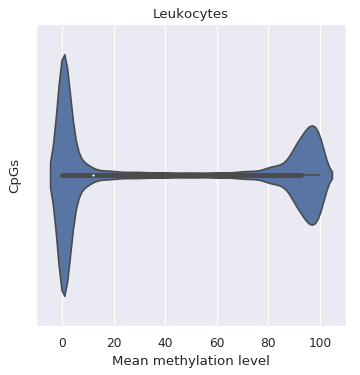

In [11]:
sns.set()
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(df_mean_sample)
plt.xlabel("Mean methylation level")
plt.ylabel("CpGs")
plt.title("Leukocytes")
plt.savefig("violinplot_leuk_all_CpGs.png")

In [12]:
data = pd.read_csv("all_cpgs.10x_leukocytes_everywhere_n=36.txt", sep='\t', index_col=0)

In [13]:
data_mean = data.mean(axis=1)

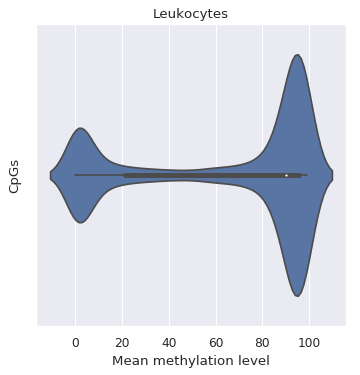

In [14]:
sns.set()
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(data_mean)
plt.xlabel("Mean methylation level")
plt.ylabel("CpGs")
plt.title("Leukocytes")
plt.savefig("violinplot_leuk_dataset_for_Aclust.png")

In [15]:
sperms = pd.read_csv("sperm_34_CpGs_10x_present_everywhere.csv", sep='\t', index_col=1)

In [16]:
sperms.drop(columns='Unnamed: 0', inplace=True)

In [17]:
sperms_mean = sperms.mean(axis=1)

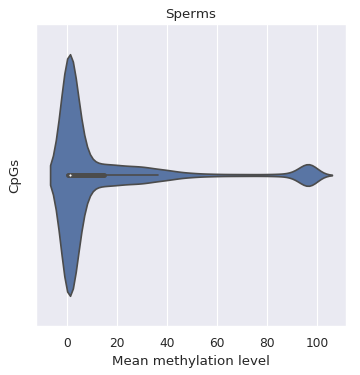

In [18]:
sns.set()
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(sperms_mean)
plt.xlabel("Mean methylation level")
plt.ylabel("CpGs")
plt.title("Sperms")
plt.savefig("violinplot_sperms_dataset_for_Aclust.png")

In [2]:
sperms_all = pd.read_csv("sperm_34_CpGs_10x.csv", sep='\t', index_col=1, na_values='-')

In [3]:
sperms_all.drop(columns='Unnamed: 0', inplace=True)

In [4]:
sperms_all_mean = sperms_all.mean(axis=1)

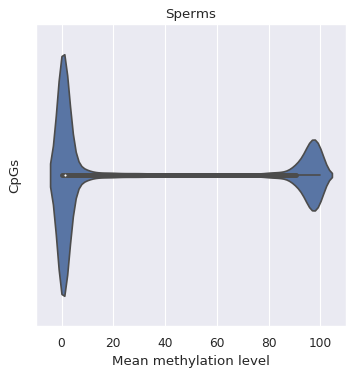

In [7]:
sns.set()
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
sns.violinplot(sperms_all_mean)
plt.xlabel("Mean methylation level")
plt.ylabel("CpGs")
plt.title("Sperms")
plt.savefig("violinplot_sperm_all_CpGs.png")

*__Histograms of methylation range distribution__ and number of CpGs in samples__*

In [3]:
df = df.transpose()

In [7]:
range_ = []
ns = []

In [8]:
for position in df:
    y1 = df[position][df[position] != "-"].astype(np.float)
    range_ += [max(y1)-min(y1)]
    ns += [len(y1)]

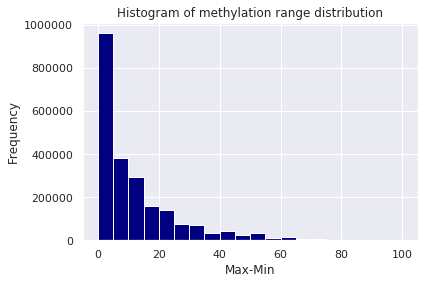

In [9]:
plt.hist(range_, bins = 20, color = "navy")
plt.xlabel('Max-Min')
plt.ylabel('Frequency')
plt.title('Histogram of methylation range distribution')
plt.show()

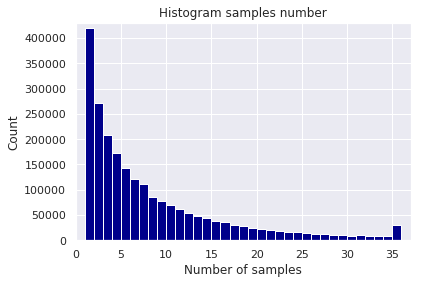

In [22]:
plt.hist(ns, color = "darkblue", bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
plt.xlabel('Number of samples')
plt.ylabel('Count')
plt.title('Histogram samples number')
plt.axis([0, 37, 0, 430000])
plt.show()

*__Distribution of number of CpGs in cluster__*

In [2]:
clust = pd.read_csv("clusters.txt", sep=',')

In [3]:
clust_t = clust.transpose()

In [4]:
clusts_length = clust_t.describe().transpose()

In [5]:
clusts_length = clusts_length[["count"]]

In [19]:
clusts_count = clusts_length.groupby("count").size()

In [27]:
clusts_count_df = pd.DataFrame({'CpGs_in_cluster': [2,3,4,5,6,7,8,10,11,12,22,29], 'Number_of_clusters': clusts_count})

In [28]:
clusts_count_df

,CpGs_in_cluster,Number_of_clusters
count,,
2,2,111
3,3,54
4,4,21
5,5,13
6,6,6
7,7,4
8,8,1
10,10,3
11,11,1


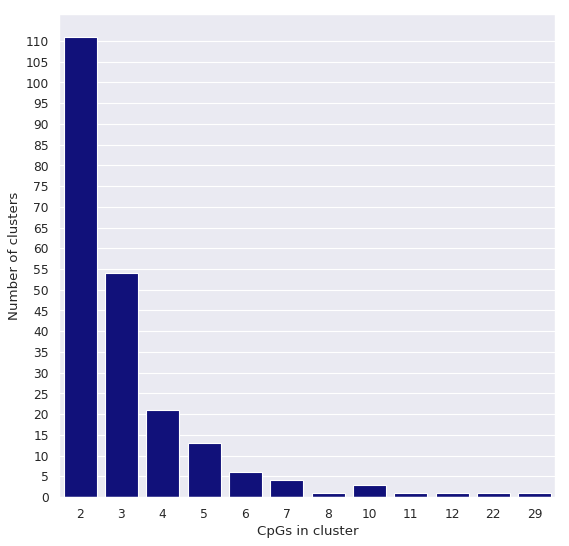

In [61]:
sns.set()
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='CpGs_in_cluster', y='Number_of_clusters', data=clusts_count_df, color='darkblue')
plt.xlabel('CpGs in cluster')
plt.ylabel('Number of clusters')
y = [0, 111]
plt.yticks(np.arange(min(y), max(y)+1, 5))
sns_plot = plt
sns_plot.savefig("Clusters_dist_leykocytes")

In [2]:
clusts_sperm = pd.read_csv("Aclusters_sperm_34samples.txt", sep=',')

In [3]:
clust_sperm_t = clusts_sperm.transpose()

In [4]:
sperm_length = clust_sperm_t.describe().transpose()

In [5]:
sperm_length = sperm_length[["count"]]

In [6]:
sperm_count = sperm_length.groupby("count").size()

In [7]:
sperm_count = pd.DataFrame({'CpGs_in_cluster': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,21,27,29,30], 'Number_of_clasters': sperm_count})

In [8]:
sperm_count = sperm_count.iloc[1:]

In [10]:
sperm_count.sum()

CpGs_in_cluster       262
Number_of_clasters    874
dtype: int64

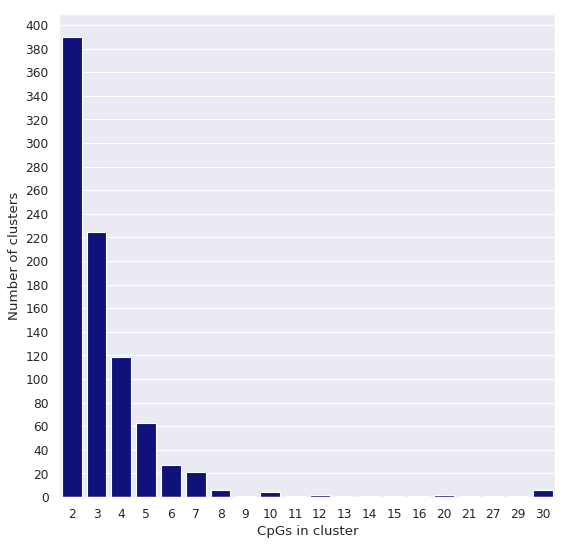

In [66]:
sns.set()
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='CpGs_in_cluster', y='Number_of_clasters', data=sperm_count, color='darkblue')
plt.xlabel('CpGs in cluster')
plt.ylabel('Number of clusters')
y = [0, 390]
plt.yticks(np.arange(min(y), max(y)+15, 20))
sns_plot = plt
sns_plot.savefig("Clusters_dist_sperm")


*__Distribution of smoking and not people__*

In [19]:
smoke_6 = pd.read_csv("smoking_last6months.csv", sep=',', index_col=1)

In [20]:
smoke_6.drop(columns=('Unnamed: 0'), inplace=True)

In [21]:
smoke_6 = smoke_6.transpose()

In [22]:
smoke_6.drop(columns=[33, 39, 90, 99, 118, 217, 439, 446, 453, 456, 470, 494, 498, 502, 504], inplace=True)

In [23]:
smoke_6 = smoke_6.transpose()

In [24]:
smoke_6.drop(columns=['FU', 'Date_exam', 'Date_MRS', 'Diff_Days', 'COMMENT', 'SMOKEDEEP', 'SMOKEFREQ'], inplace=True)

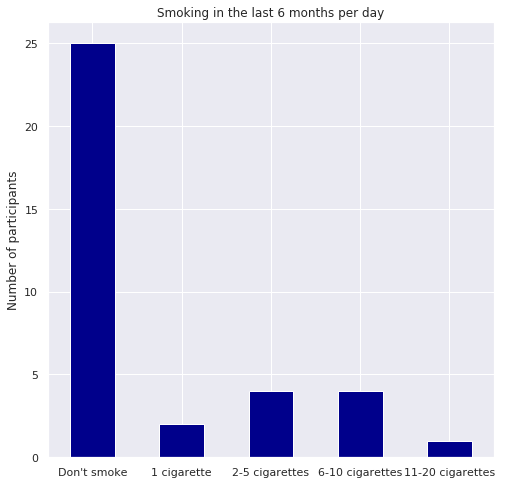

In [26]:
ax = smoke_6.groupby('smoking_last6months')['id'].nunique().plot(kind='bar', rot=0, figsize=(8,8), color='darkblue')
ax.set_xticklabels(["Don't smoke", "1 cigarette", "2-5 cigarettes", "6-10 cigarettes", "11-20 cigarettes"])
plt.xlabel('')
plt.ylabel('Number of participants')
plt.title('Smoking in the last 6 months per day')
plt.savefig('smoke_last6months.png')